<h1 style = 'text-align: center; color : Red'>EDA Assignment - Lending Club Case Study <h1 style = 'text-align: center; color : Gray'>Umesh Wagharalkar</h1>

<h2 style = "color : Gray">Project Objectives</h2>

The Landing Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

 <h2 style = "color : Gray">Importing Libraries</h2>

In [422]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

# Regular expressions for string manipulation
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

 <h2 style = "color : Gray">Loading the data</h2>

In [490]:
data = pd.read_csv("loan.csv")
data.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0    24000.00            Verified  Dec-11   Fully Paid          n   
1    30000.00     Source Verified  Dec-11  Charged Off          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   
1    Borrower added on 12/22/11 > I plan to use t...          car      bike   

  zip_code addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ 27.65            0           Jan-85               1   
1    309xx         GA  1.00            0           Apr-99               5   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN         3        0   
1                     NaN                     NaN         3        0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      13648     83.70%          9                   f       0.00   
1       1687      9.40%          4                   f       0.00   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00      5863.16          5833.84          5000.00   
1           0.00      1008.71          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             May-16   
1       Apr-13           119.66          NaN             Sep-13   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                        0.00                          NaN            1   
1                        0.00                          NaN            1   

  application_type  annual_inc_joint  dti_joint  verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                        NaN   
1       INDIVIDUAL               NaN        NaN                        NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0               0           NaN          NaN          NaN         NaN   
1               0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   
1          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN               NaN     NaN   
1          NaN          NaN         NaN       NaN               NaN     NaN   

   total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  \
0          NaN           NaN                   NaN          NaN   
1          NaN           NaN                   NaN          NaN   

   bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt  \
0             NaN      NaN                      0.00            0   
1             NaN      NaN                      0.00            0   

   mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  \
0    

 <h2 style = "color : Gray">Inspecting The Dataframe</h2>
<ul> <li>Shape</li>  <li>Info</li> <li>Data Types</li> <li>Describe</li> </ul>

In [424]:
data.shape

(39717, 111)

In [425]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [426]:
data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [427]:
data.describe()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count   39717.00   39717.00   39717.00     39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45   
std    210694.13  265678.31    7456.67      7187.24          7128.45   
min     54734.00   70699.00     500.00       500.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00   
50%    665665.00  850812.00   10000.00      9600.00          8975.00   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00   

       installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  \
count     39717.00    39717.00 39717.00     39717.00        39717.00   
mean        324.56    68968.93    13.32         0.15            0.87   
std         208.87    63793.77     6.68         0.49            1.07   
min          15.69     4000.00     0.00         0.00            0.00   
25%         167.02    40404.00     8.17         0.00            0.00   
50%         280.22    59000.00    13.40         0.00            1.00   
75%         430.78    82300.00    18.60         0.00            1.00   
max        1305.19  6000000.00    29.99        11.00            8.00   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
count                14035.00                 2786.00  39717.00 39717.00   
mean                    35.90                   69.70      9.29     0.06   
std                     22.02                   43.82      4.40     0.24   
min                      0.00                    0.00      2.00     0.00   
25%                     18.00                   22.00      6.00     0.00   
50%                     34.00                   90.00      9.00     0.00   
75%                     52.00                  104.00     12.00     0.00   
max                    120.00                  129.00     44.00     4.00   

       revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
count   39717.00   39717.00   39717.00       39717.00     39717.00   
mean    13382.53      22.09      51.23          50.99     12153.60   
std     15885.02      11.40     375.17         373.82      9042.04   
min         0.00       2.00       0.00           0.00         0.00   
25%      3703.00      13.00       0.00           0.00      5576.93   
50%      8850.00      20.00       0.00           0.00      9899.64   
75%     17058.00      29.00       0.00           0.00     16534.43   
max    149588.00      90.00    6311.47        6307.37     58563.68   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count         39717.00         39717.00       39717.00            39717.00   
mean          11567.15          9793.35        2263.66                1.36   
std            8942.67          7065.52        2608.11                7.29   
min               0.00             0.00           0.00                0.00   
25%            5112.31          4600.00         662.18                0.00   
50%            9287.15          8000.00        1348.91                0.00   
75%           15798.81         13653.26        2833.40                0.00   
max           58563.68         35000.02       23563.68              180.20   

       recoveries  collection_recovery_fee  last_pymnt_amnt  \
count    39717.00                 39717.00         39717.00   
mean        95.22                    12.41          2678.83   
std        688.74                   148.67          4447.14   
min          0.00                     0.00             0.00   
25%          0.00                     0.00           218.68   
50%          0.00                     0.00           546.14   
75%          0.00                     0.00          3293.16   
max      29623.35                  7002.19         36115.20   

       collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
count                    39661.00                 

<h2 style = "color : Gray">Data Cleaning</h2>


In [428]:
# sum it up to check how many rows have all missing values
print('Number of empty Rows:')
print(data.isnull().all(axis=1).sum())
# Observation: There are no empty rows in whole dataset.

# sum it up to check how many columns have all missing values
print('Number of empty Columns:')
print(data.isnull().all(axis=0).sum())
# Observation: There are 54 columns have all missing values.

Number of empty Rows:
0
Number of empty Columns:
54


In [429]:
# Finding Which columns have all null values

data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [430]:
# Droping columns where all values are null. Below in sequence all columns have null values

data.dropna(how='all', inplace = True, axis = 1)

In [431]:
# Droping additional columns which are not needed for the analysis.

columns_drop = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type','policy_code','initial_list_status','installment','pymnt_plan','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','desc','emp_title']
data.drop(labels = columns_drop, axis =1, inplace=True)
print(data.shape)
data.isnull().sum()

(39717, 27)


id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
collections_12_mths_ex_med      56
acc_now_delinq                   0
chargeoff_within_12_mths        56
delinq_amnt                      0
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

In [432]:
# Data shape after dropping columns which had nothing 

data.shape

# Observations
# So now we are left with 38 columns

(39717, 27)

In [433]:
# Formating emp_length column to have only numbers.

data.emp_length.fillna('0',inplace=True)
data['emp_length']=data.emp_length.str.extract('(\d+)')
data.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   

  int_rate grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%     B        B2         10           RENT    24000.00   
1   15.27%     C        C4          1           RENT    30000.00   

  verification_status issue_d  loan_status  \
0            Verified  Dec-11   Fully Paid   
1     Source Verified  Dec-11  Charged Off   

                                                 url      purpose     title  \
0  https://lendingclub.com/browse/loanDetail.acti...  credit_card  Computer   
1  https://lendingclub.com/browse/loanDetail.acti...          car      bike   

  zip_code addr_state   dti  collections_12_mths_ex_med  acc_now_delinq  \
0    860xx         AZ 27.65                        0.00               0   
1    309xx         GA  1.00                        0.00               0   

   chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens  
0                      0.00            0                  0.00       0.00  
1                      0.00            0                  0.00       0.00

In [434]:
# pub_rec_bankruptcies can be cleaned for further analysis.
print("Before cleaning:")
print(data.pub_rec_bankruptcies.isnull().sum())
print("After cleaning:")
data.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(data.pub_rec_bankruptcies.isnull().sum())

Before cleaning:
697
After cleaning:
0


In [435]:
# Removeing % symbol from int_rate column
data['int_rate'] = data['int_rate'].str.rstrip('%')


In [436]:
# convert amount columns into numeric data to find some correlation.

cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','annual_inc','dti','emp_length']
data[cols1] = data[cols1].apply(pd.to_numeric)

In [437]:
# Lets take a look on important variables loan status in total loan issued

(data.loan_status.value_counts()*100)/len(data)

# Observations
# 82.96 percent loans were fully paid.
# Close to 14% loans were charged off

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

In [438]:
# Lets take a look on important variable purpose of loan in total loans issued

(data.purpose.value_counts()*100)/len(data)

# Observations
# Most of the loans taken for debt consolidation(47%) and Credit card bill payment
# Other is also one of the main area where loans were taken.

debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: purpose, dtype: float64

<h2 style = "color : Gray">Derive Columns For Analysis -</h2>


In [439]:
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

data.issue_d = pd.to_datetime(data.issue_d, format='%b-%y')
data['year']=data['issue_d'].dt.year
data['month']=data['issue_d'].dt.month

data.head(1)

# Observations
# Two new columns month and year were derived from issue date

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   

   int_rate grade sub_grade  emp_length home_ownership  annual_inc  \
0     10.65     B        B2          10           RENT    24000.00   

  verification_status    issue_d loan_status  \
0            Verified 2011-12-01  Fully Paid   

                                                 url      purpose     title  \
0  https://lendingclub.com/browse/loanDetail.acti...  credit_card  Computer   

  zip_code addr_state   dti  collections_12_mths_ex_med  acc_now_delinq  \
0    860xx         AZ 27.65                        0.00               0   

   chargeoff_within_12_mths  delinq_amnt pub_rec_bankruptcies  tax_liens  \
0                      0.00            0                 0.00       0.00   

   year  month  
0  2011     12

In [440]:
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
data['loan_amnt_cats'] = pd.cut(data['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
data['annual_inc_cats'] = pd.cut(data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
data['int_rate_cats'] = pd.cut(data['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
data['dti_cats'] = pd.cut(data['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [441]:
# Lets take a look on shape and data
print(data.shape)
data.head(1)
# Observation is we have created extra 4 columns after dropping many.

(39717, 33)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   

   int_rate grade sub_grade  emp_length home_ownership  annual_inc  \
0     10.65     B        B2          10           RENT    24000.00   

  verification_status    issue_d loan_status  \
0            Verified 2011-12-01  Fully Paid   

                                                 url      purpose     title  \
0  https://lendingclub.com/browse/loanDetail.acti...  credit_card  Computer   

  zip_code addr_state   dti  collections_12_mths_ex_med  acc_now_delinq  \
0    860xx         AZ 27.65                        0.00               0   

   chargeoff_within_12_mths  delinq_amnt pub_rec_bankruptcies  tax_liens  \
0                      0.00            0                 0.00       0.00   

   year  month loan_amnt_cats annual_inc_cats int_rate_cats dti_cats  
0  2011     12         0-7000     20000-40000         10-13      NaN

<h2 style = "color : Gray">Univariate Analysis Part 1 -</h2>


In [442]:
# Basic statistics with .describe() - Quantitative Variables
data['loan_amnt'].describe()

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

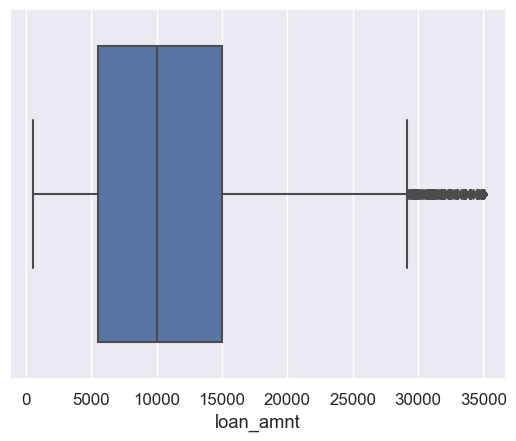

In [443]:
sns.boxplot(data.loan_amnt)

In [444]:
# Basic statistics with .describe() -Quantitative Variables

print('Before Removal of Outliers :\n')
print(data['annual_inc'].describe())

# Removing Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

data = data[data["annual_inc"] < data["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(data["annual_inc"].describe())

# Now below data looks much better. Lets plot later and find some conclusions

Before Removal of Outliers :

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64
After Removal of Outliers :
count    39319.00
mean     65524.22
std      35215.89
min       4000.00
25%      40000.00
50%      58000.00
75%      81000.00
max     234996.00
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

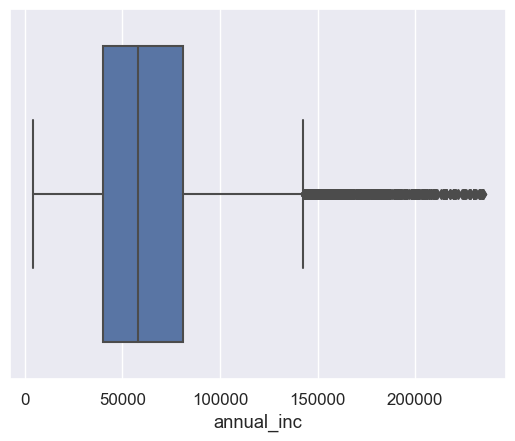

In [445]:
sns.boxplot(data.annual_inc)

In [446]:
# Basic statistics with .describe() -Quantitative Variables

data['int_rate'].describe()

# Average intrest rate is 12 %
# after 75% percentile interest rate zoom'ed to 25% from 15%.

count   39319.00
mean       12.01
std         3.72
min         5.42
25%         9.25
50%        11.83
75%        14.54
max        24.59
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

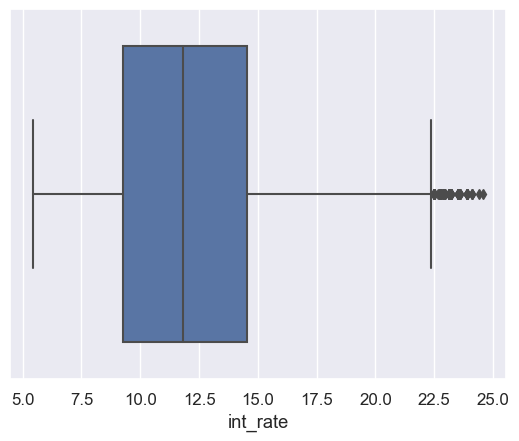

In [447]:
sns.boxplot(data.int_rate)

<h2 style = "color : Gray">Univariate Analysis Part 2 -</h2>


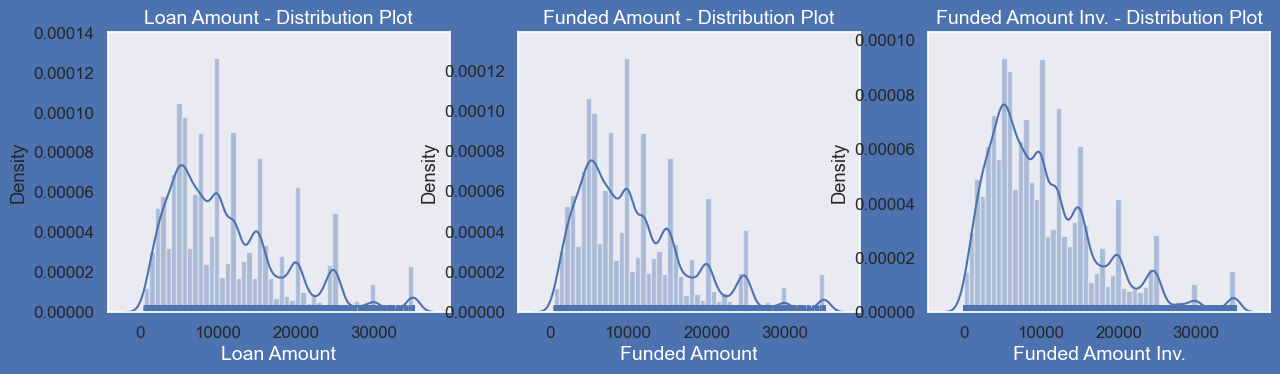

In [448]:
# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(data['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(data['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(data['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.
# We will work with only loan amount column for rest of our analysis.

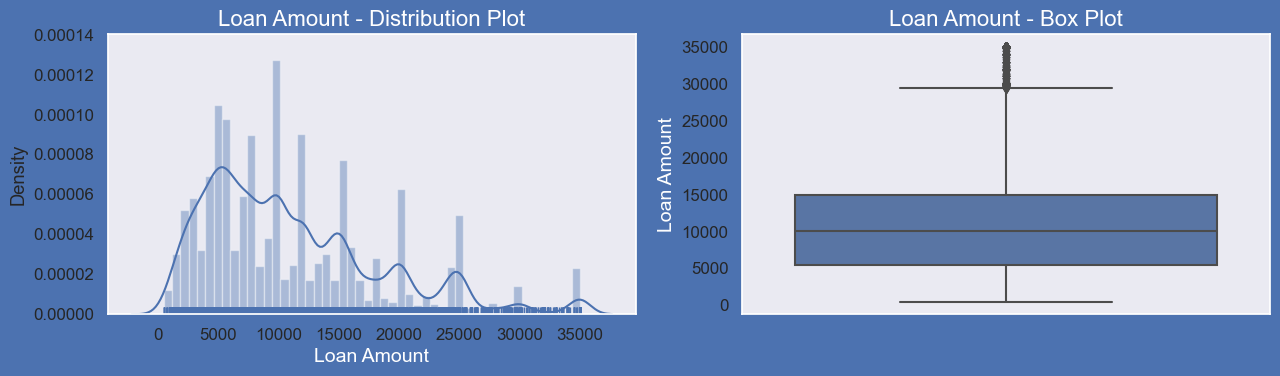

In [449]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(data['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=data['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

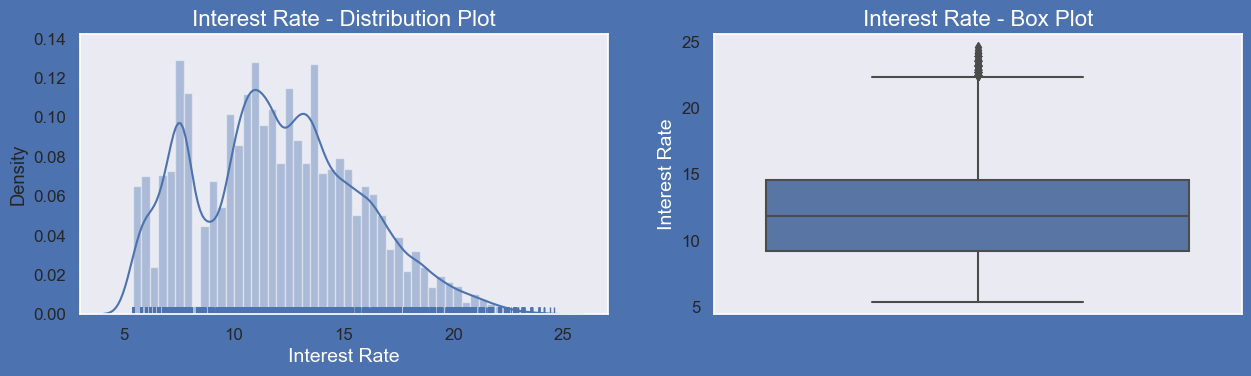

In [450]:
# Univariate Analysis on Intrest Rate-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(data['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=data['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

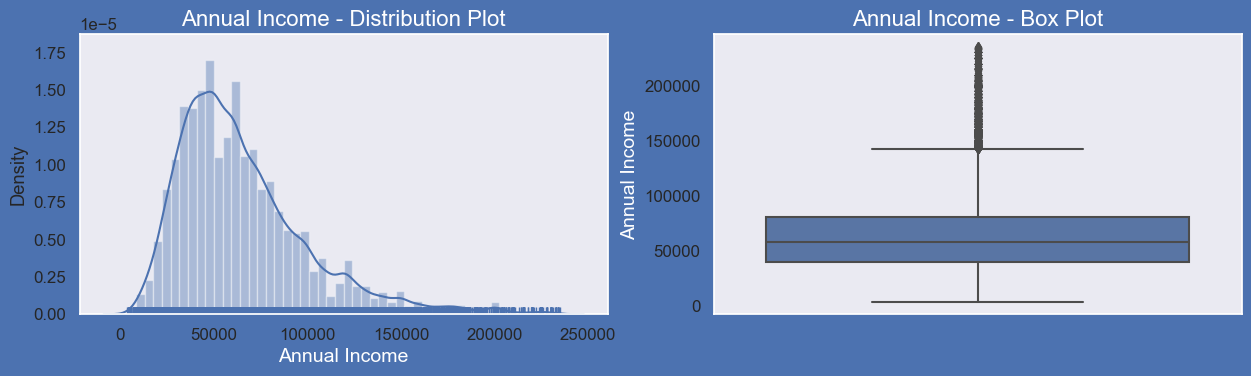

In [451]:
# Univariate Analysis on Annual Income - Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(data['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=data['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000

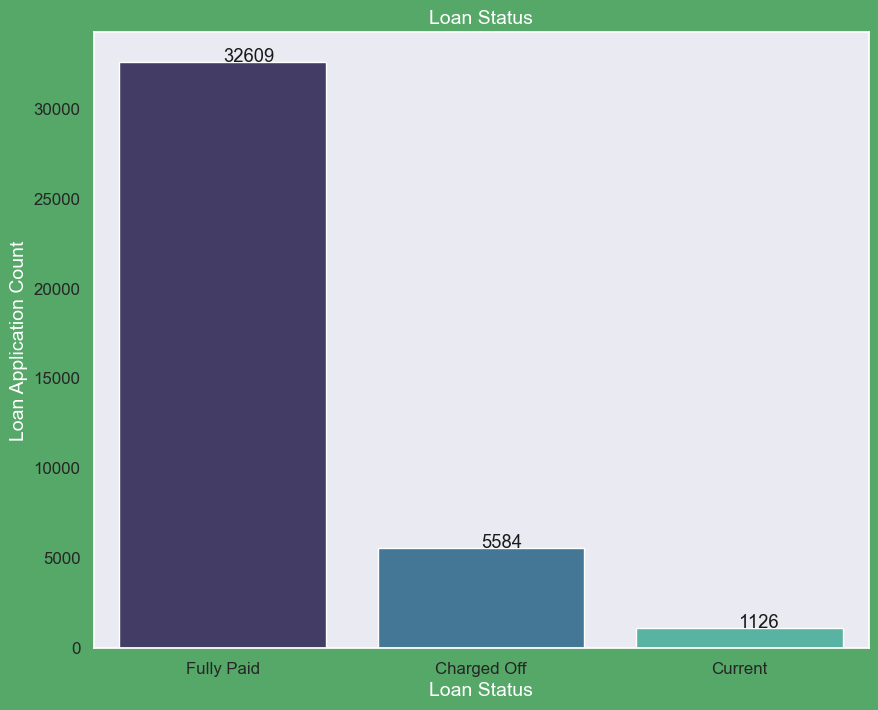

In [452]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='g')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=data,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=data['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

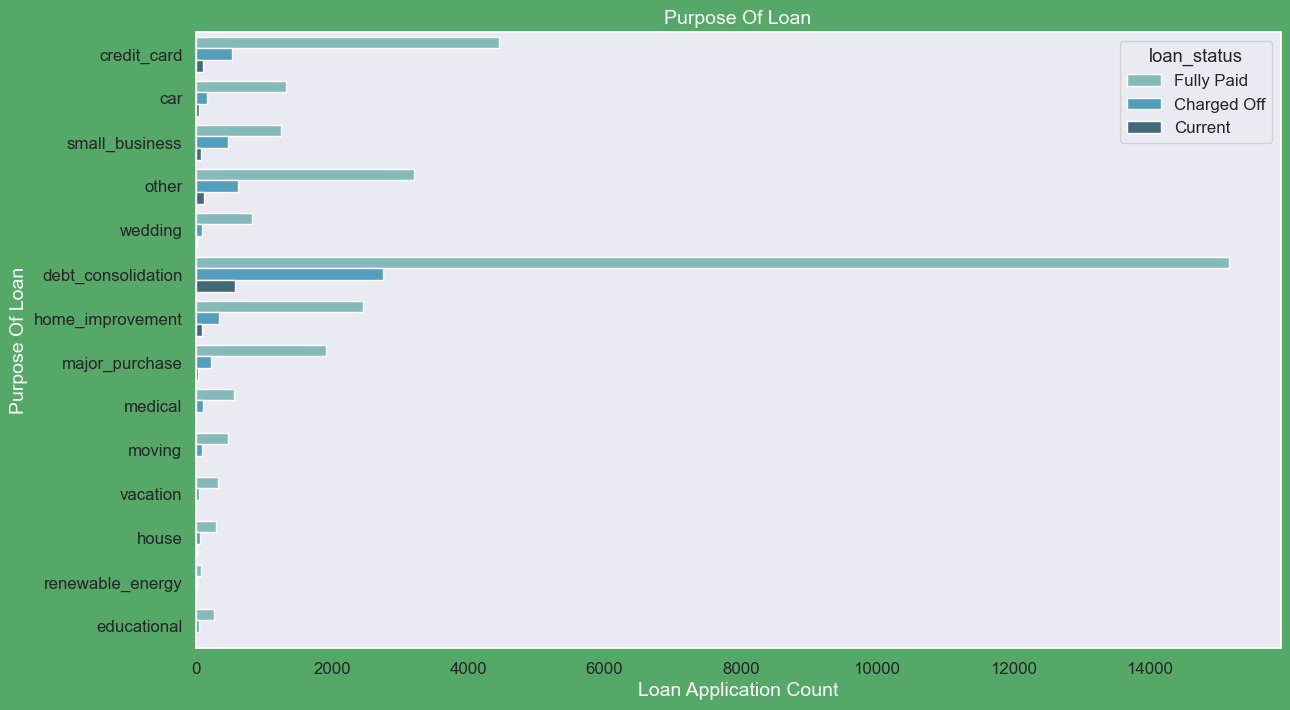

In [454]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='g')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=data,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

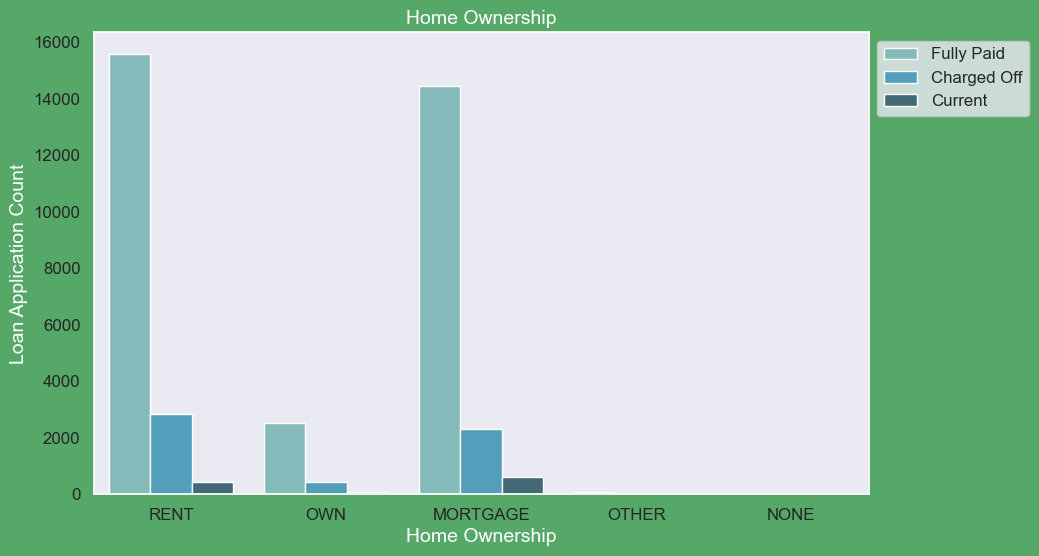

In [455]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='g')
ax = sns.countplot(x="home_ownership",data=data,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

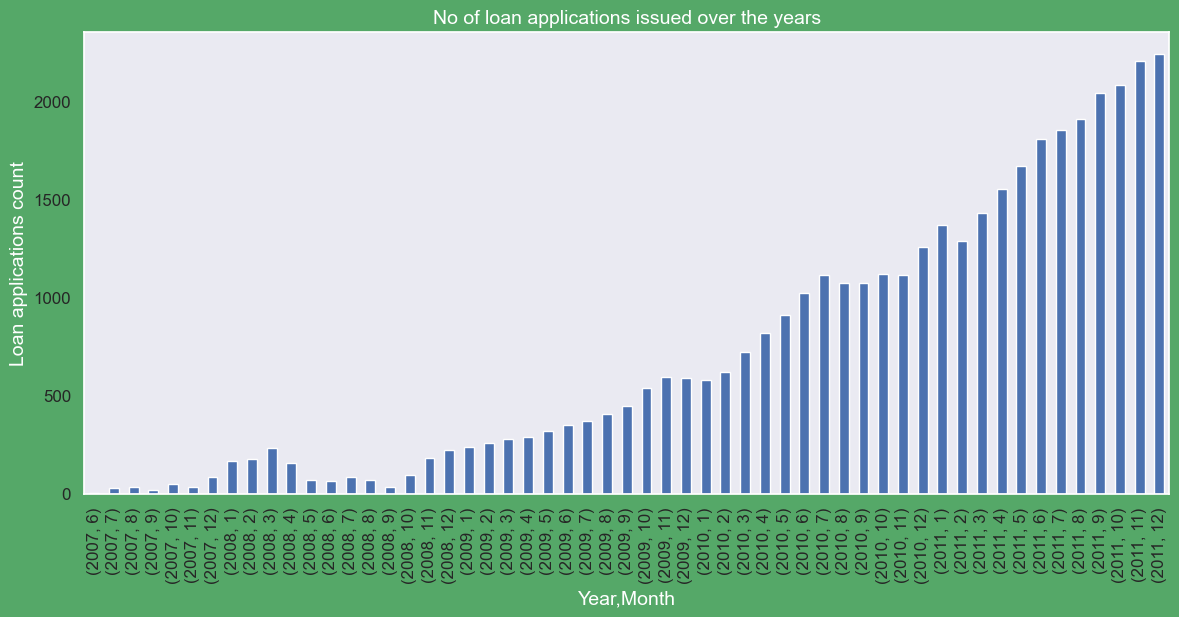

In [456]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
plt.figure(figsize=(14,6),facecolor='g')
data.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()


# Observation is that count of loan application is increasing every passing year.
# so increase in number of loan applications are adding more to number of charged off applications.
# number of loans issued in 2008( May-October) got dipped, may be due to Recession.

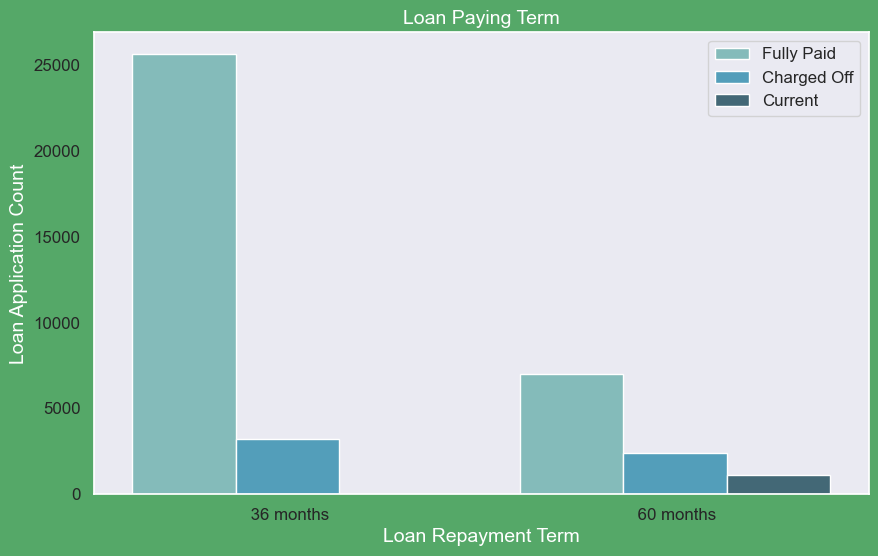

In [457]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='g')
ax = sns.countplot(x="term",data=data,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

<h2 style = "color : Gray">Correlation Matrix - Quantitative Variables</h2>


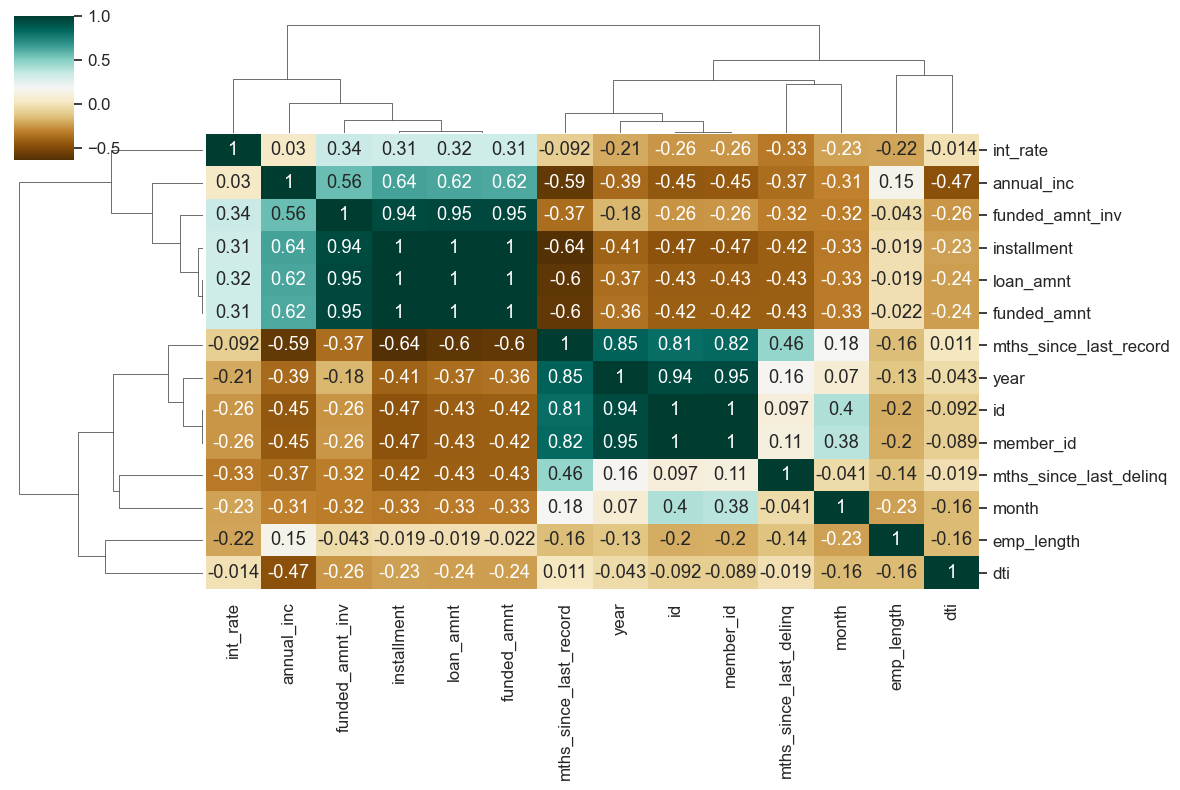

In [458]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.

loan_correlation = A.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

# Observation is that Loan amount, investor amount, funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted.
# Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
# That means when annual income is low DTI is high & vice versa.
# positive correlation between annual income and employment years.
# That means income increases with work experience ;)

<h2 style = "color : Gray">Bivariate Analysis : Part 1</h2>


In [459]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = data.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

loan_status annual_inc_cats  Charged Off  Current  Fully Paid  Total  \
0                   0-20000          237        9         943   1189   
1               20000-40000         1514      170        7004   8688   
2               40000-60000         1729      345        9534  11608   
3               60000-80000         1024      240        6597   7861   
4                   80000 +         1080      362        8531   9973   

loan_status  Chargedoff_Proportion  
0                             0.20  
1                             0.17  
2                             0.15  
3                             0.13  
4                             0.11

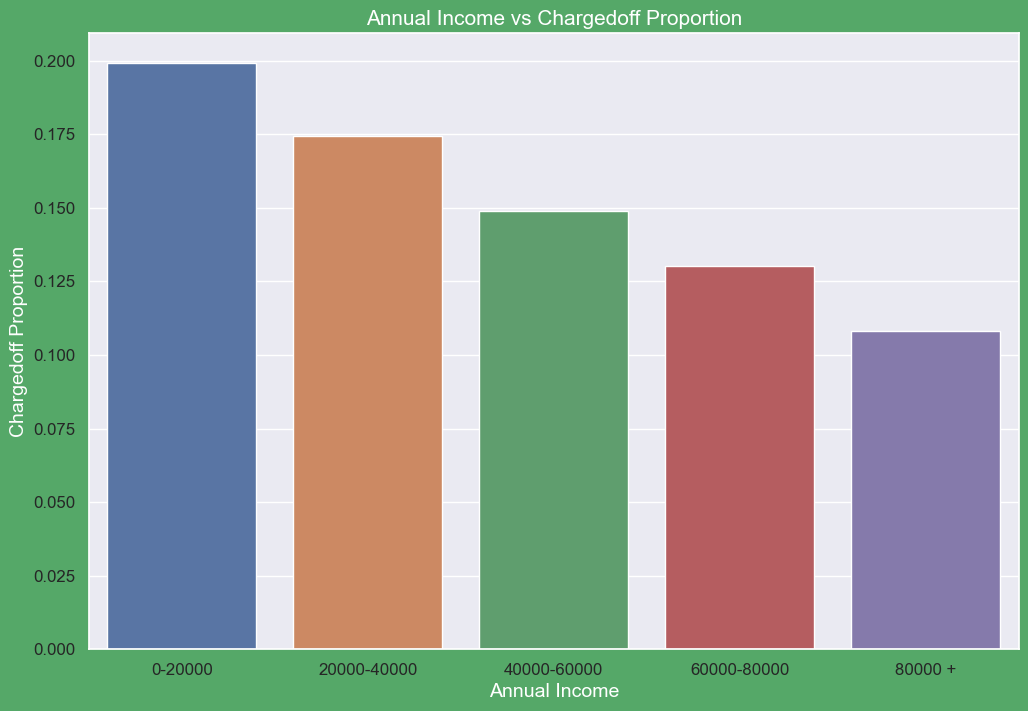

In [460]:
# Drawing bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

In [461]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

loan_status             purpose  Charged Off  Current  Fully Paid    Total  \
11               small_business       472.00    74.00     1251.00  1797.00   
10             renewable_energy        19.00     1.00       81.00   101.00   
3                   educational        55.00     0.00      268.00   323.00   
9                         other       629.00   126.00     3203.00  3958.00   
8                        moving        91.00     7.00      479.00   577.00   
5                         house        58.00    14.00      299.00   371.00   
7                       medical       106.00    12.00      568.00   686.00   
2            debt_consolidation      2752.00   580.00    15165.00 18497.00   
12                     vacation        53.00     6.00      322.00   381.00   
4              home_improvement       338.00    97.00     2459.00  2894.00   
1                   credit_card       537.00   102.00     4450.00  5089.00   
0                           car       160.00    50.00     1332.00  1542.00   
6                major_purchase       220.00    37.00     1909.00  2166.00   
13                      wedding        94.00    20.00      823.00   937.00   

loan_status  Chargedoff_Proportion  
11                            0.26  
10                            0.19  
3                             0.17  
9                             0.16  
8                             0.16  
5                             0.16  
7                             0.15  
2                             0.15  
12                            0.14  
4                             0.12  
1                             0.11  
0                             0.10  
6                             0.10  
13                            0.10

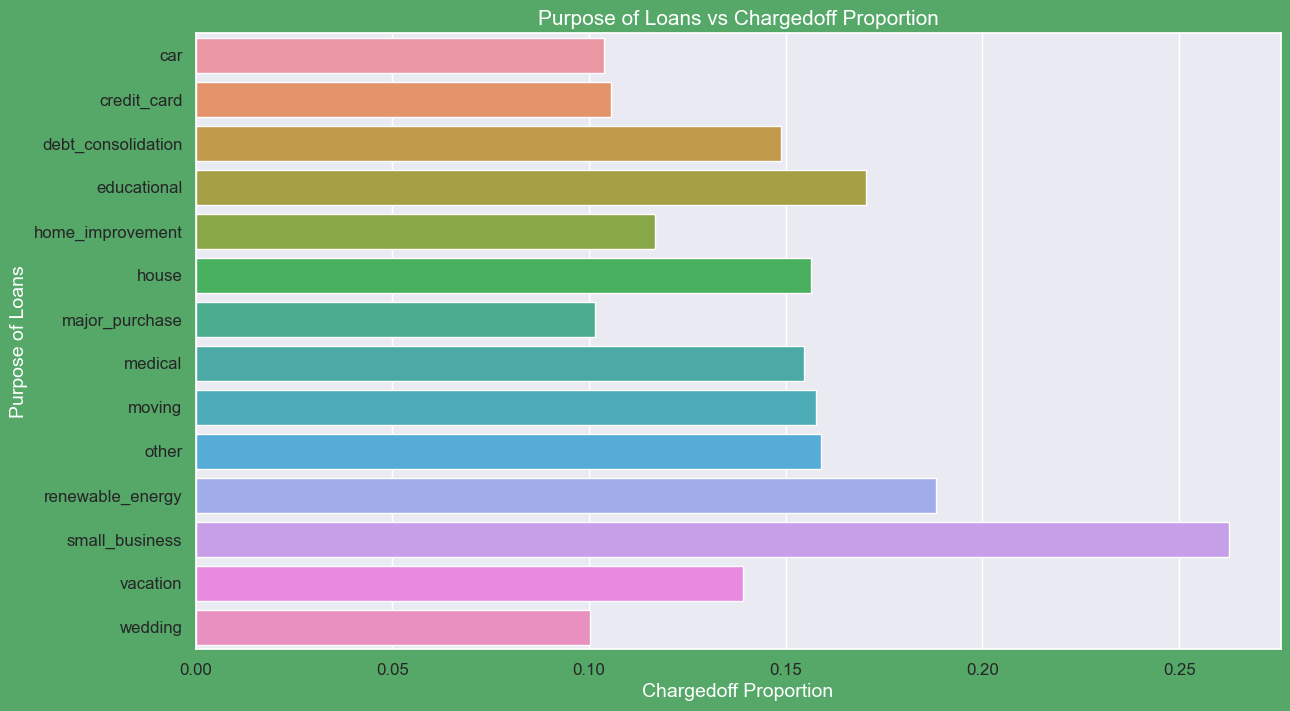

In [462]:
# Drowing bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# Pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='g')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

In [463]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

loan_status grade  Charged Off  Current  Fully Paid  Total  \
6               G           99       17         190    306   
5               F          312       71         642   1025   
4               E          704      176        1906   2786   
3               D         1112      216        3916   5244   
2               C         1342      262        6411   8015   
1               B         1414      344       10167  11925   
0               A          601       40        9377  10018   

loan_status  Chargedoff_Proportion  
6                             0.32  
5                             0.30  
4                             0.25  
3                             0.21  
2                             0.17  
1                             0.12  
0                             0.06

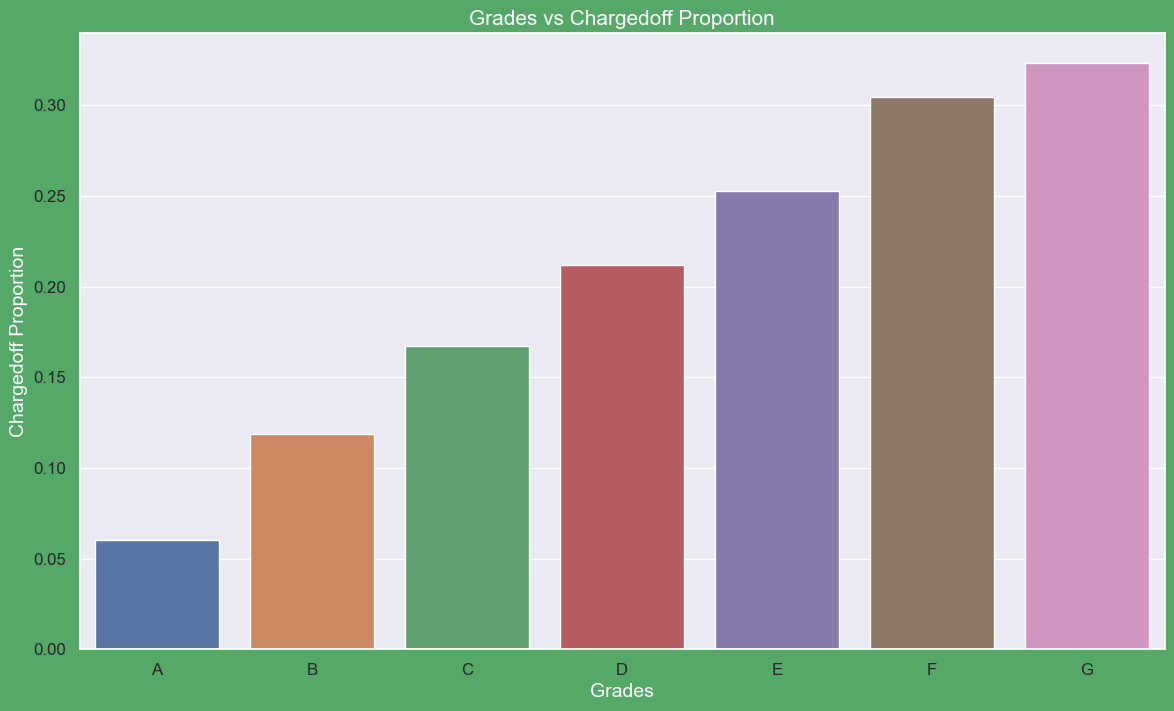

In [464]:
# Drawing bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='g')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged of is increasing with grade moving from "A" towards "G"

In [465]:
# Understanding grades better
# Bivariate Analysis on sub grade against Chargedoff_Proportion

grade_vs_loan = data.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

loan_status sub_grade  Charged Off  Current  Fully Paid   Total  \
29                 F5        53.00     4.00       55.00  112.00   
32                 G3        19.00     3.00       25.00   47.00   
31                 G2        27.00     1.00       47.00   75.00   
34                 G5        10.00     1.00       18.00   29.00   
28                 F4        52.00    17.00       96.00  165.00   
30                 G1        31.00    10.00       61.00  102.00   
23                 E4       126.00    28.00      293.00  447.00   
26                 F2        69.00    16.00      162.00  247.00   
27                 F3        50.00    11.00      118.00  179.00   
25                 F1        88.00    23.00      211.00  322.00   
24                 E5       106.00    29.00      264.00  399.00   
20                 E1       195.00    40.00      517.00  752.00   
21                 E2       160.00    42.00      444.00  646.00   
19                 D5       209.00    36.00      617.00  862.00   
33                 G4        12.00     2.00       39.00   53.00   
18                 D4       214.00    63.00      693.00  970.00   
17                 D3       253.00    56.00      850.00 1159.00   
22                 E3       117.00    37.00      388.00  542.00   
16                 D2       269.00    61.00     1000.00 1330.00   
15                 D1       167.00     0.00      756.00  923.00   
12                 C3       269.00    41.00     1200.00 1510.00   
14                 C5       208.00    32.00      931.00 1171.00   
13                 C4       211.00    30.00      988.00 1229.00   
11                 C2       321.00    78.00     1593.00 1992.00   
10                 C1       333.00    81.00     1699.00 2113.00   
9                  B5       356.00    89.00     2244.00 2689.00   
8                  B4       328.00    74.00     2097.00 2499.00   
7                  B3       335.00    92.00     2457.00 2884.00   
6                  B2       225.00    56.00     1753.00 2034.00   
5                  B1       170.00    33.00     1616.00 1819.00   
4                  A5       216.00    27.00     2478.00 2721.00   
3                  A4       178.00    13.00     2676.00 2867.00   
2                  A3       103.00     0.00     1696.00 1799.00   
1                  A2        74.00     0.00     1425.00 1499.00   
0                  A1        30.00     0.00     1102.00 1132.00   

loan_status  Chargedoff_Proportion  
29                            0.47  
32                            0.40  
31                            0.36  
34                            0.34  
28                            0.32  
30                            0.30  
23                            0.28  
26                            0.28  
27                            0.28  
25                            0.27  
24                            0.27  
20                            0.26  
21                            0.25  
19                            0.24  
33                            0.23  
18                            0.22  
17                            0.22  
22                            0.22  
16                            0.20  
15                            0.18  
12                            0.18  
14                            0.18  
13                            0.17  
11                            0.16  
10                            0.16  
9                             0.13  
8                             0.13  
7                             0.12  
6                             0.11  
5                             0.09  
4                             0.08  
3                             0.06  
2                             0.06  
1                             0.05  
0                             0.03

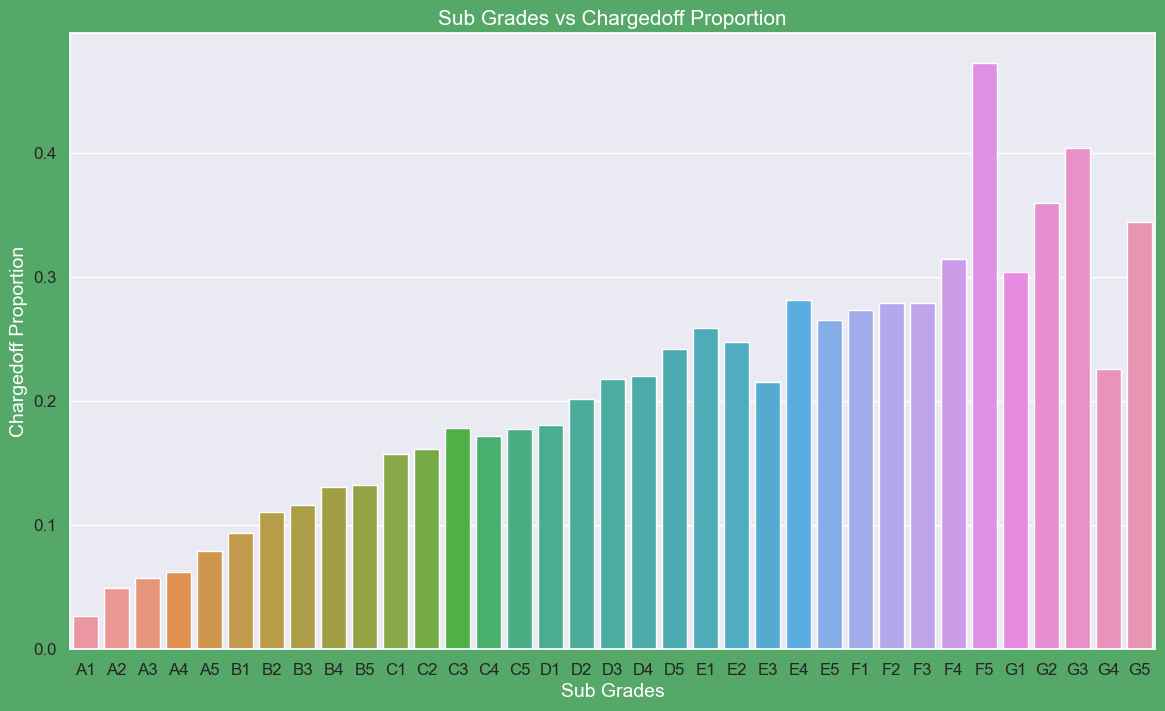

In [466]:
# Drawing bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='g')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

In [467]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = data.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

loan_status int_rate_cats  Charged Off  Current  Fully Paid  Total  \
3                    16 +         1250      351        3317   4918   
2                 12.5-16         1995      329        9354  11678   
1                   10-13         1224      269        8083   9576   
0                    0-10          825       77       11403  12305   

loan_status  Chargedoff_Proportion  
3                             0.25  
2                             0.17  
1                             0.13  
0                             0.07

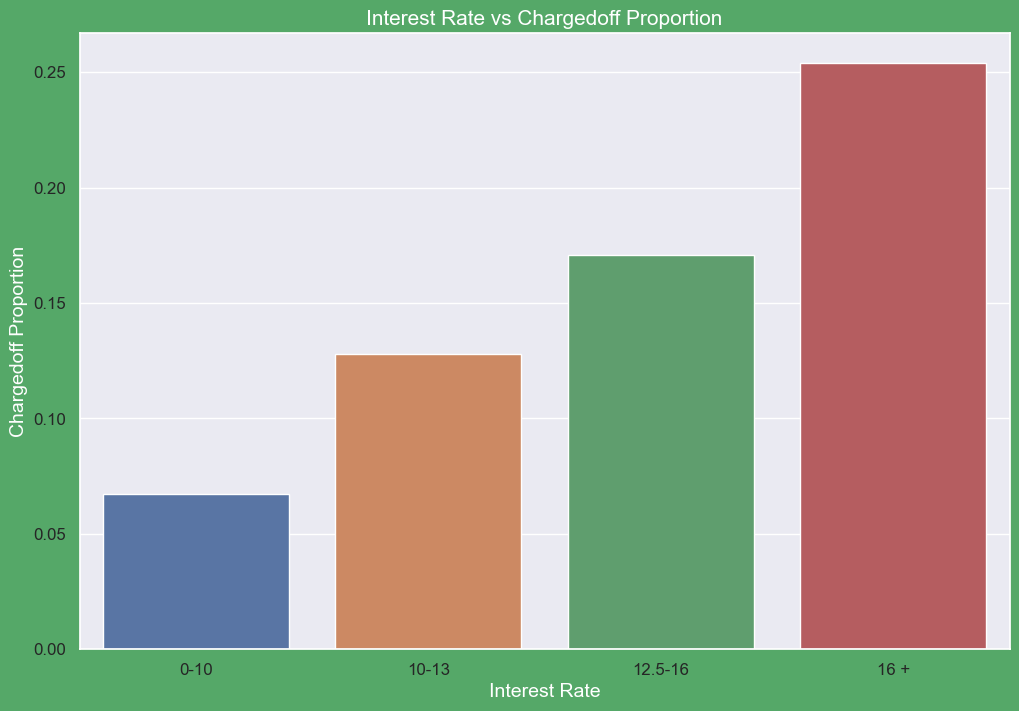

In [468]:
# Drawing some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

In [469]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = data.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

loan_status  emp_length  Charged Off  Current  Fully Paid  Total  \
0                     0          227       42         801   1070   
10                   10         1316      386        7038   8740   
7                     7          262       62        1435   1759   
1                     1         1090      143        6533   7766   
5                     5          456       87        2712   3255   
8                     8          203       43        1216   1462   
6                     6          305       58        1846   2209   
3                     3          551       82        3426   4059   
4                     4          456       94        2860   3410   
2                     2          561       97        3684   4342   
9                     9          157       32        1058   1247   

loan_status  Chargedoff_Proportion  
0                             0.21  
10                            0.15  
7                             0.15  
1                             0.14  
5                             0.14  
8                             0.14  
6                             0.14  
3                             0.14  
4                             0.13  
2                             0.13  
9                             0.13

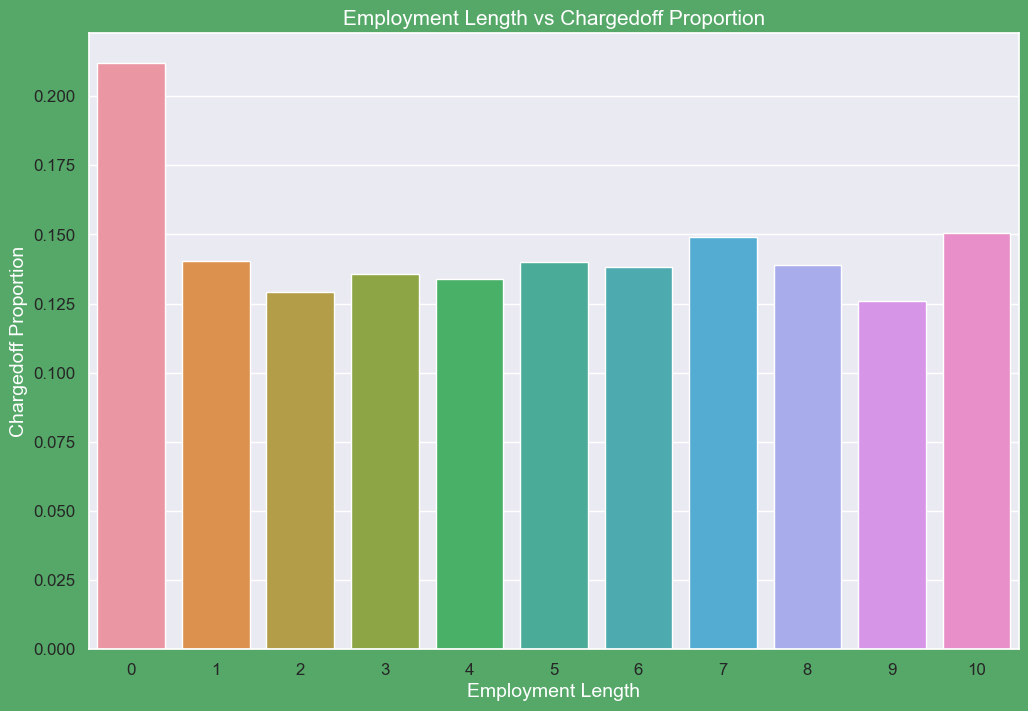

In [470]:
# Drawing bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

In [471]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan = data.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# states NE has very high chances of charged off but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of charged offs in good number of applications.

loan_status addr_state  Charged Off  Current  Fully Paid   Total  \
28                  NE         3.00     0.00        2.00    5.00   
32                  NV       107.00    17.00      368.00  492.00   
40                  SD        12.00     2.00       50.00   64.00   
0                   AK        14.00     2.00       63.00   79.00   
9                   FL       497.00    85.00     2252.00 2834.00   
24                  MO       114.00    16.00      551.00  681.00   
13                  ID         1.00     0.00        5.00    6.00   
31                  NM        30.00     5.00      149.00  184.00   
11                  HI        28.00     8.00      138.00  174.00   
4                   CA      1116.00   149.00     5767.00 7032.00   
36                  OR        71.00    16.00      364.00  451.00   
43                  UT        40.00     6.00      211.00  257.00   
20                  MD       161.00    26.00      849.00 1036.00   
10                  GA       215.00    38.00     1135.00 1388.00   
46                  WA       127.00    22.00      684.00  833.00   
30                  NJ       277.00    59.00     1490.00 1826.00   
29                  NH        25.00     5.00      139.00  169.00   
27                  NC       114.00    38.00      629.00  781.00   
22                  MI       102.00    16.00      596.00  714.00   
39                  SC        66.00    13.00      389.00  468.00   
3                   AZ       121.00    30.00      718.00  869.00   
17                  KY        45.00    13.00      266.00  324.00   
47                  WI        63.00    20.00      376.00  459.00   
35                  OK        40.00    12.00      246.00  298.00   
23                  MN        81.00    10.00      522.00  613.00   
14                  IL       196.00    47.00     1262.00 1505.00   
33                  NY       488.00   111.00     3156.00 3755.00   
26                  MT        11.00     2.00       72.00   85.00   
38                  RI        25.00     4.00      165.00  194.00   
6                   CT        94.00    24.00      618.00  736.00   
44                  VA       176.00    38.00     1182.00 1396.00   
34                  OH       153.00    44.00     1020.00 1217.00   
5                   CO        97.00    26.00      659.00  782.00   
18                  LA        53.00     9.00      367.00  429.00   
1                   AL        54.00    17.00      378.00  449.00   
48                  WV        21.00     5.00      151.00  177.00   
19                  MA       156.00    42.00     1123.00 1321.00   
37                  PA       178.00    49.00     1281.00 1508.00   
41                  TN         2.00     0.00       15.00   17.00   
42                  TX       313.00    66.00     2315.00 2694.00   
16                  KS        31.00    16.00      224.00  271.00   
45                  VT         6.00     1.00       47.00   54.00   
2                   AR        27.00    10.00      208.00  245.00   
25                  MS         2.00     0.00       17.00   19.00   
8                   DE        12.00     1.00      101.00  114.00   
7                   DC        15.00     3.00      196.00  214.00   
49                  WY         4.00     3.00       76.00   83.00   
21                  ME         0.00     0.00        3.00    3.00   
15                  IN         0.00     0.00        9.00    9.00   
12                  IA         0.00     0.00        5.00    5.00   

loan_status  Chargedoff_Proportion  
28                            0.60  
32                            0.22  
40                            0.19  
0                             0.18  
9                             0.18  
24                            0.17  
13                            0.17  
31                            0.16  
11                            0.16  
4                             0.16  
36                            0.16  
43                            0.16  
20                            0.16  
10           

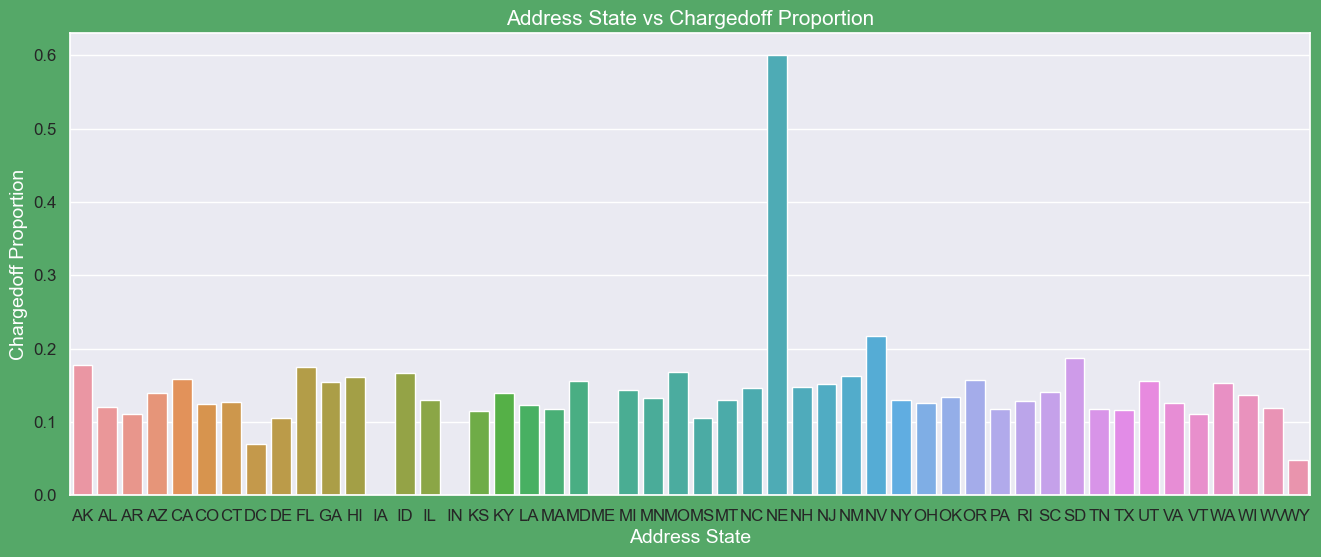

In [472]:
# Drawing bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='g')
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan)
ax1.set_xlabel('Address State',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# states NE has very high chances of charged off but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of charged offs in good number of applications.

In [473]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = data.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Current'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

loan_status verification_status  Charged Off  Current  Fully Paid  Total  \
2                      Verified         2032      593       10000  12625   
1               Source Verified         1422      306        8135   9863   
0                  Not Verified         2130      227       14474  16831   

loan_status  Chargedoff_Proportion  
2                             0.16  
1                             0.14  
0                             0.13

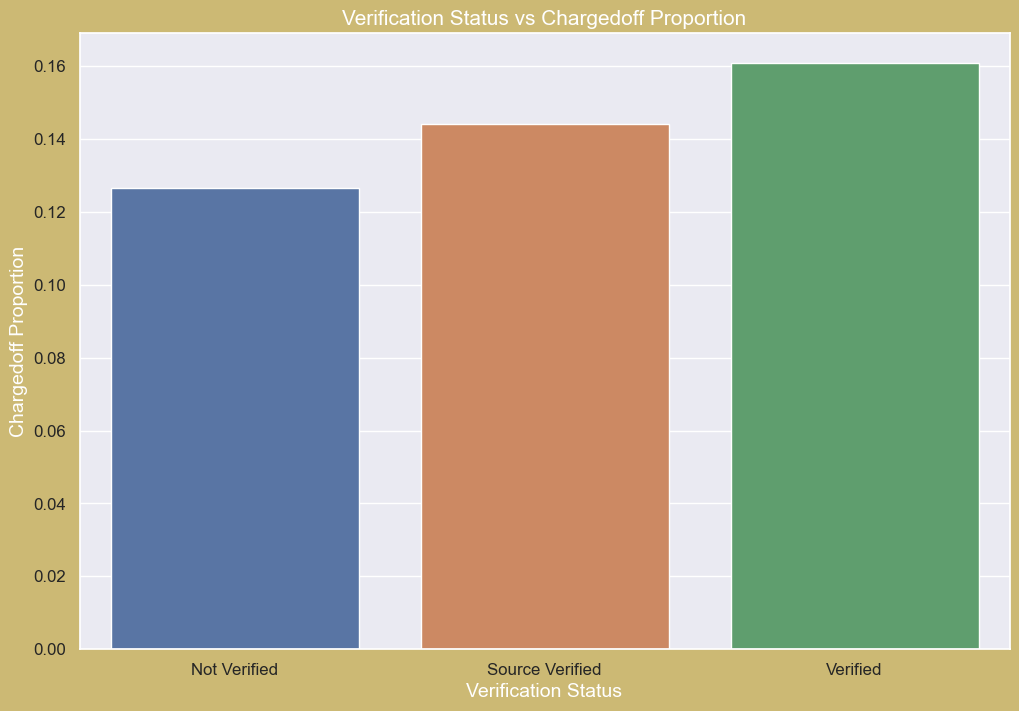

In [474]:
# Drawing bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

In [475]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan = data.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

loan_status pub_rec_bankruptcies  Charged Off  Current  Fully Paid    Total  \
2                           2.00         2.00     2.00        3.00     7.00   
1                           1.00       365.00    37.00     1268.00  1670.00   
3                      Not Known       116.00     0.00      572.00   688.00   
0                           0.00      5101.00  1087.00    30766.00 36954.00   

loan_status  Chargedoff_Proportion  
2                             0.29  
1                             0.22  
3                             0.17  
0                             0.14

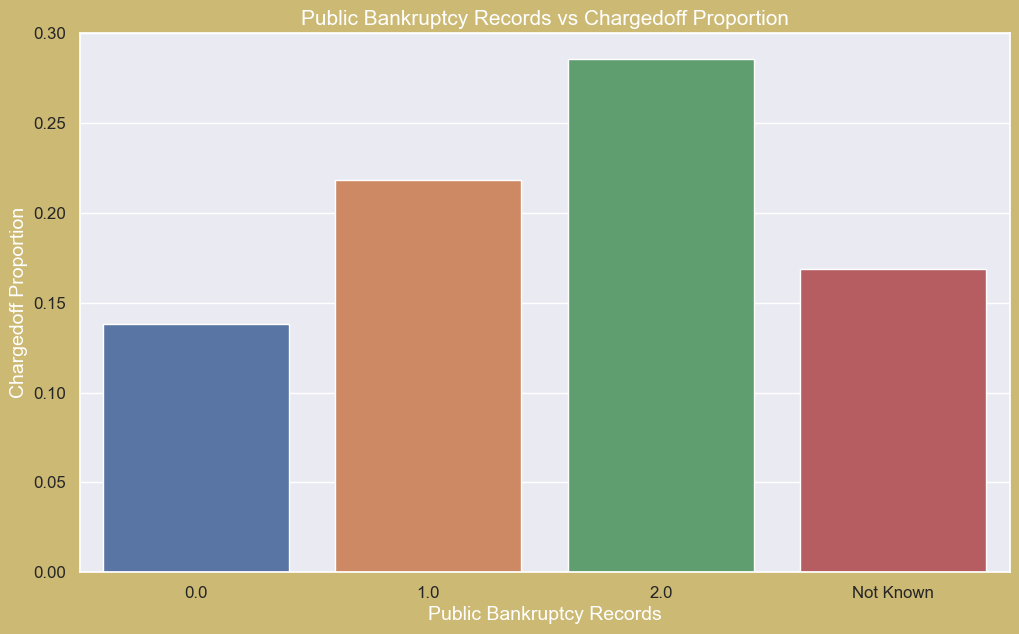

In [476]:
# Drawing bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='y')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

<h2 style = "color : Gray">Bivariate Analysis : Part 2</h2>


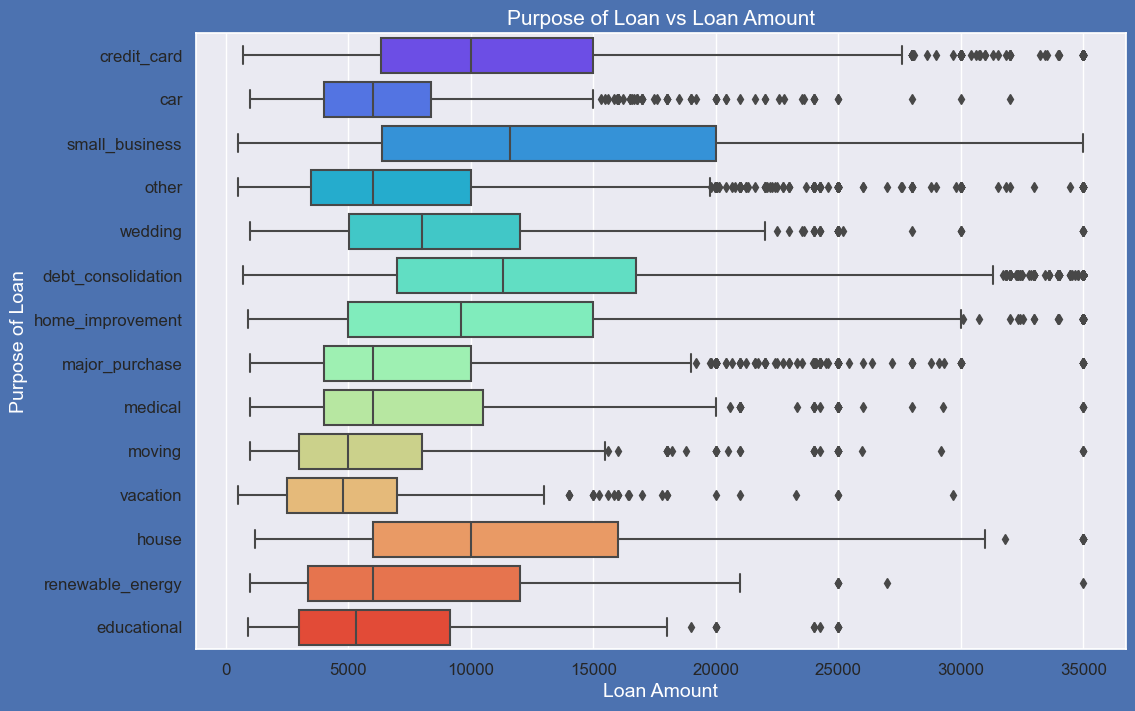

In [477]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =data,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.

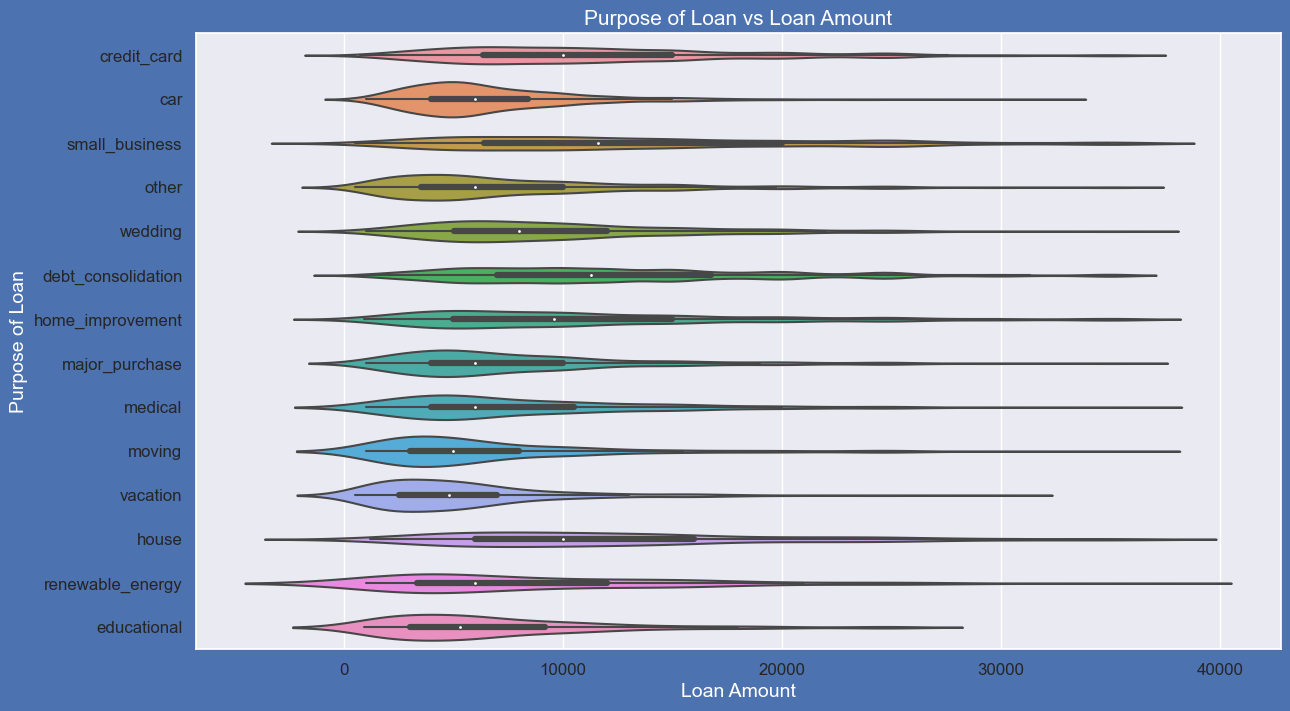

In [478]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# violin Plot - It shows the distribution of quantitative data across several levels of one (or more) categorical variables 
# such that those distributions can be compared. 

plt.figure(figsize=(14,8),facecolor='b')
ax=sns.violinplot(y='purpose', x='loan_amnt', data =data)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed
# as compare to loan taken for other purposes.

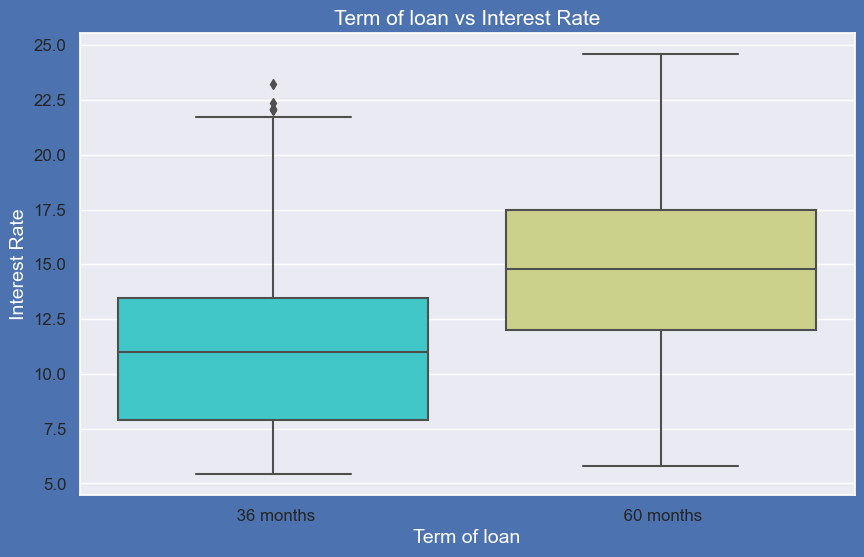

In [479]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =data,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

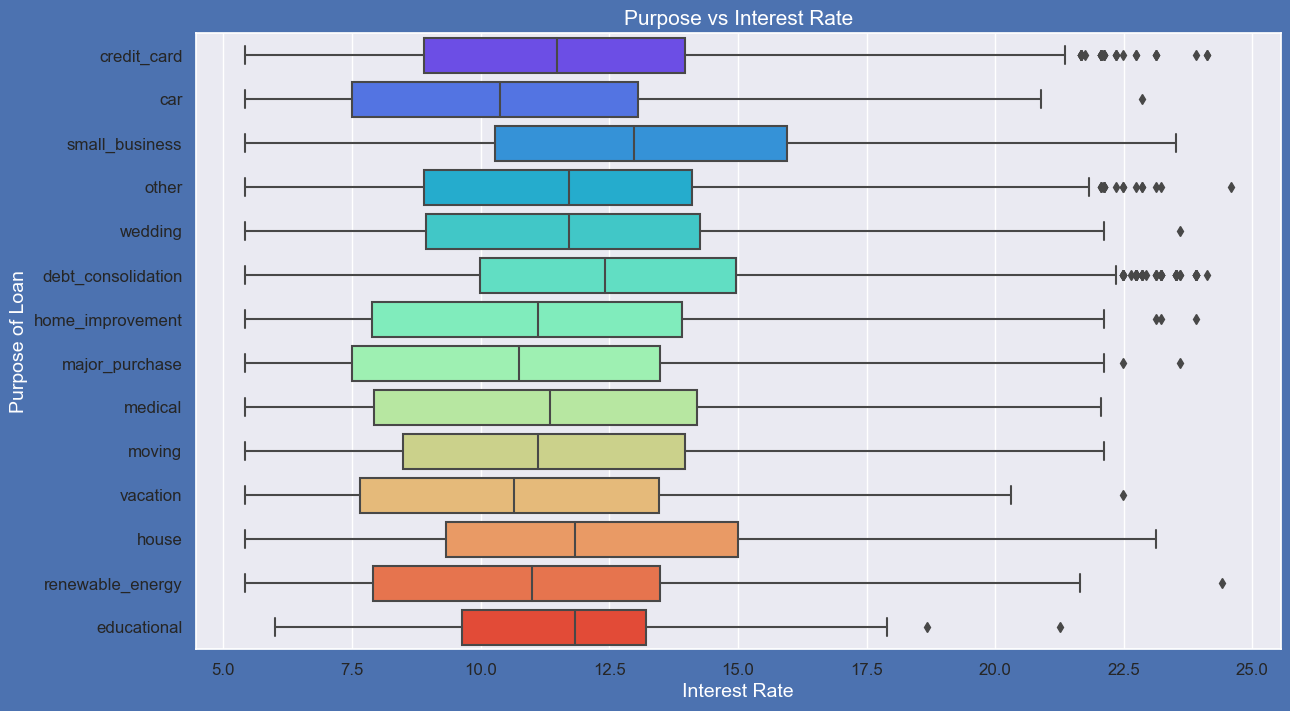

In [480]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =data,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
# Debt consolidation is 2nd where borrowers had to pay more interest rate.

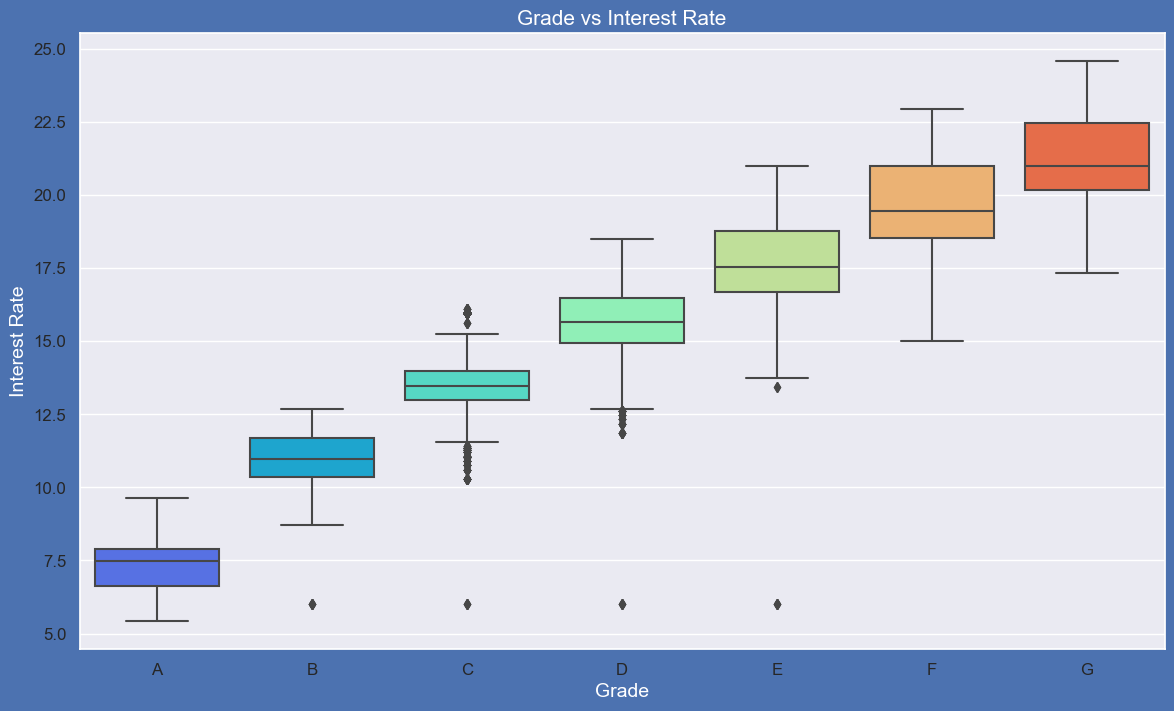

In [481]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='grade', data =data,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')
plt.show()

# Observations:
# A-grade is a top letter grade for a lender to assign to a borrower.
# The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
# It is clear that intrest rate is increasing with grades moving from A to F.

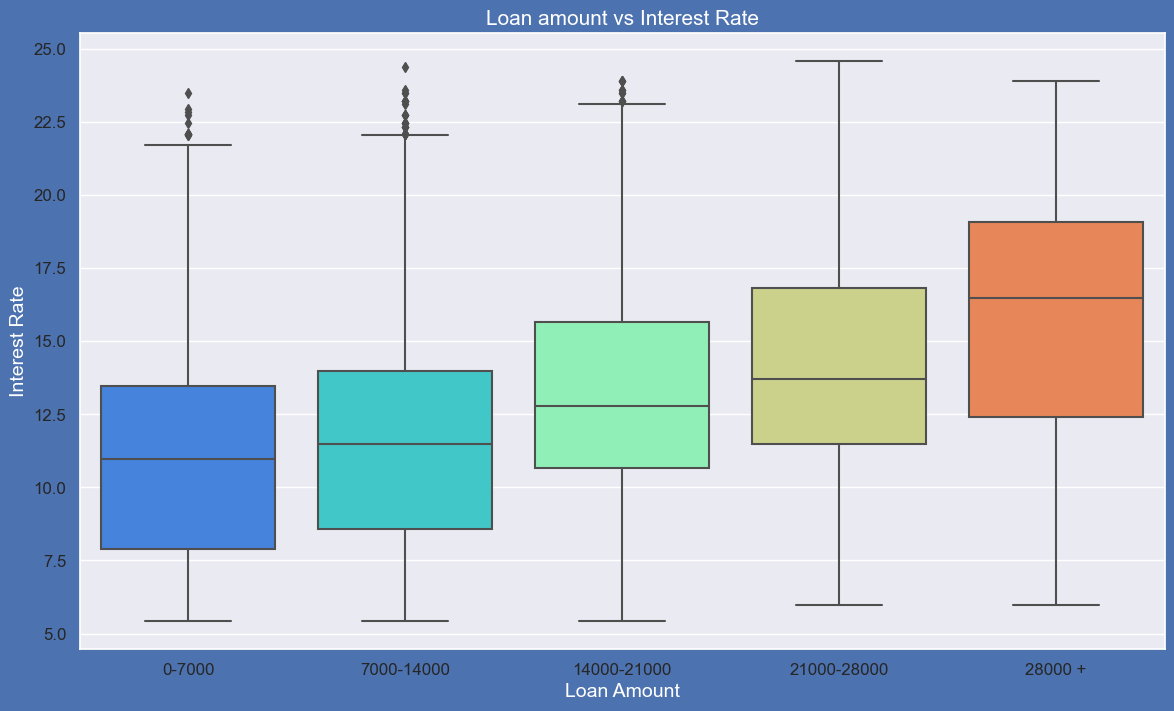

In [482]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =data,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that intrest rate is increasing with loan amount increase.
# probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the
# interest rate.

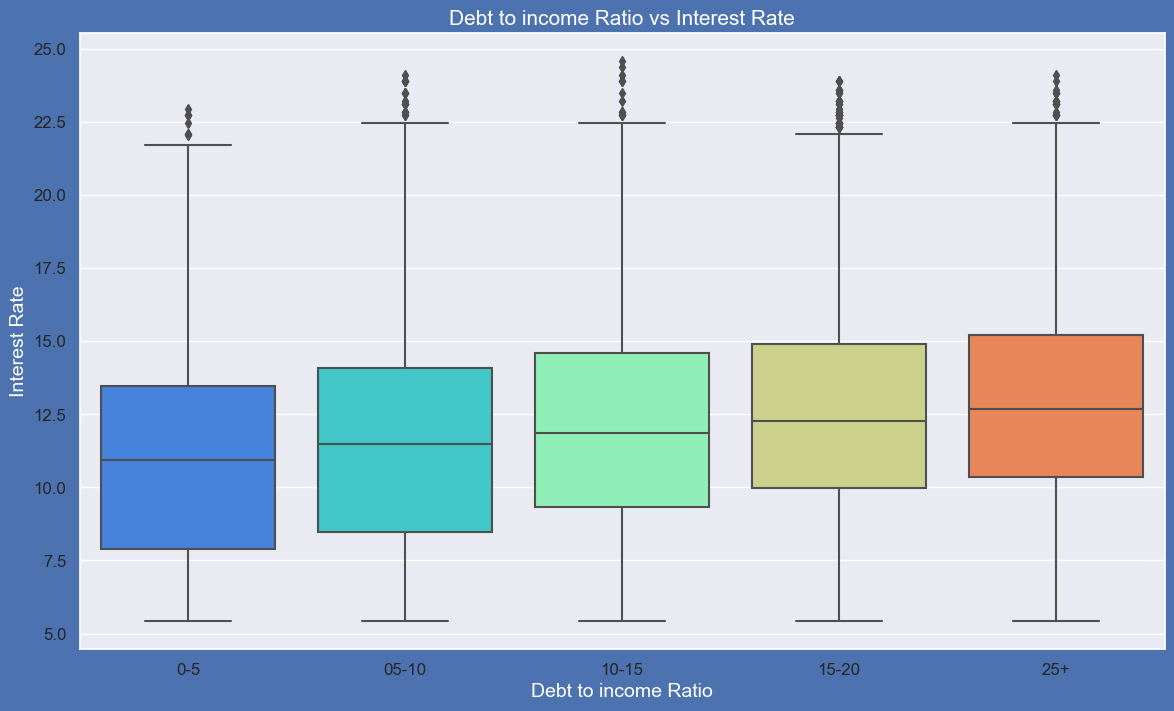

In [483]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =data,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
plt.show()

# Observations:
# If your DTI is low enough you may get a lower interest rate.
# Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

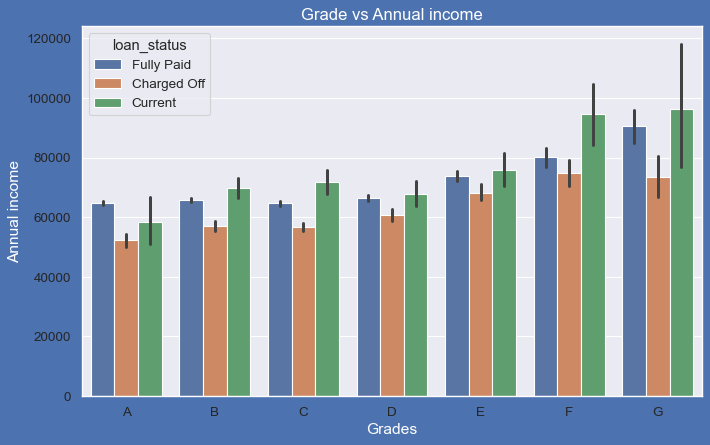

In [484]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=data, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()

# Observations:
# From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
# who'paid fully' for each and every grade (i.e. at same interest range)

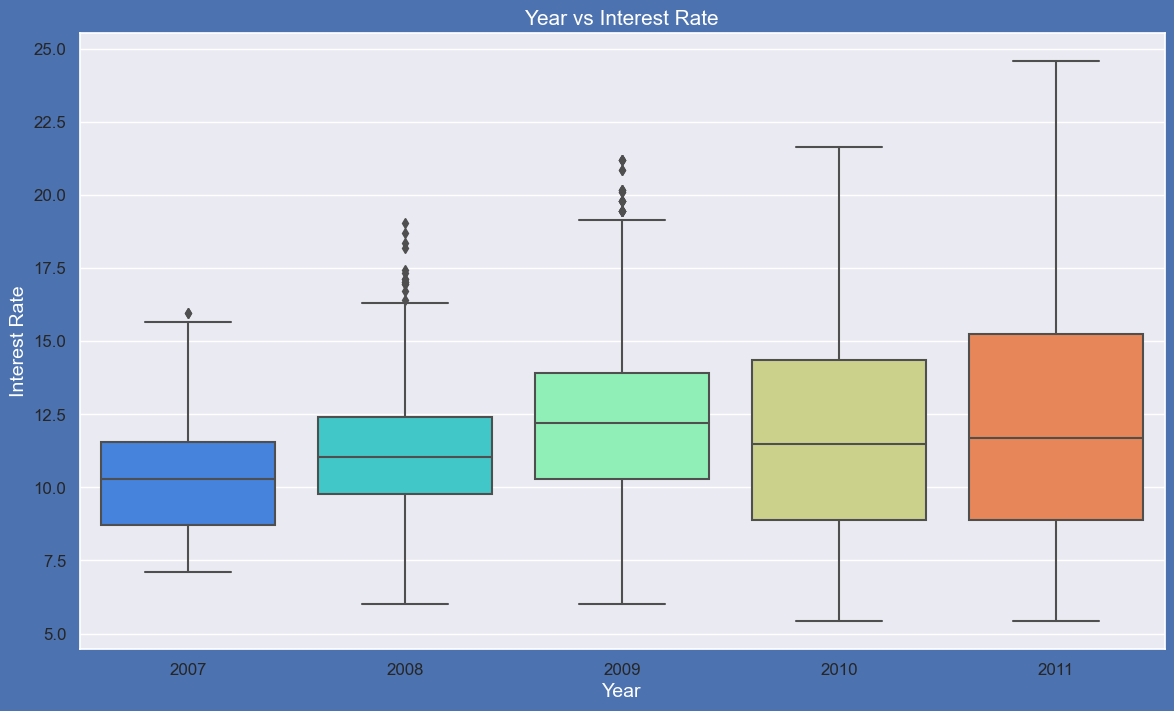

In [485]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='year', data =data,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

# Observations:
# Plot shows intrest rate is increasing slowly with increase in year.

<h2 style = "color : Gray">Multivariate Analysis - Pair Plots</h2>


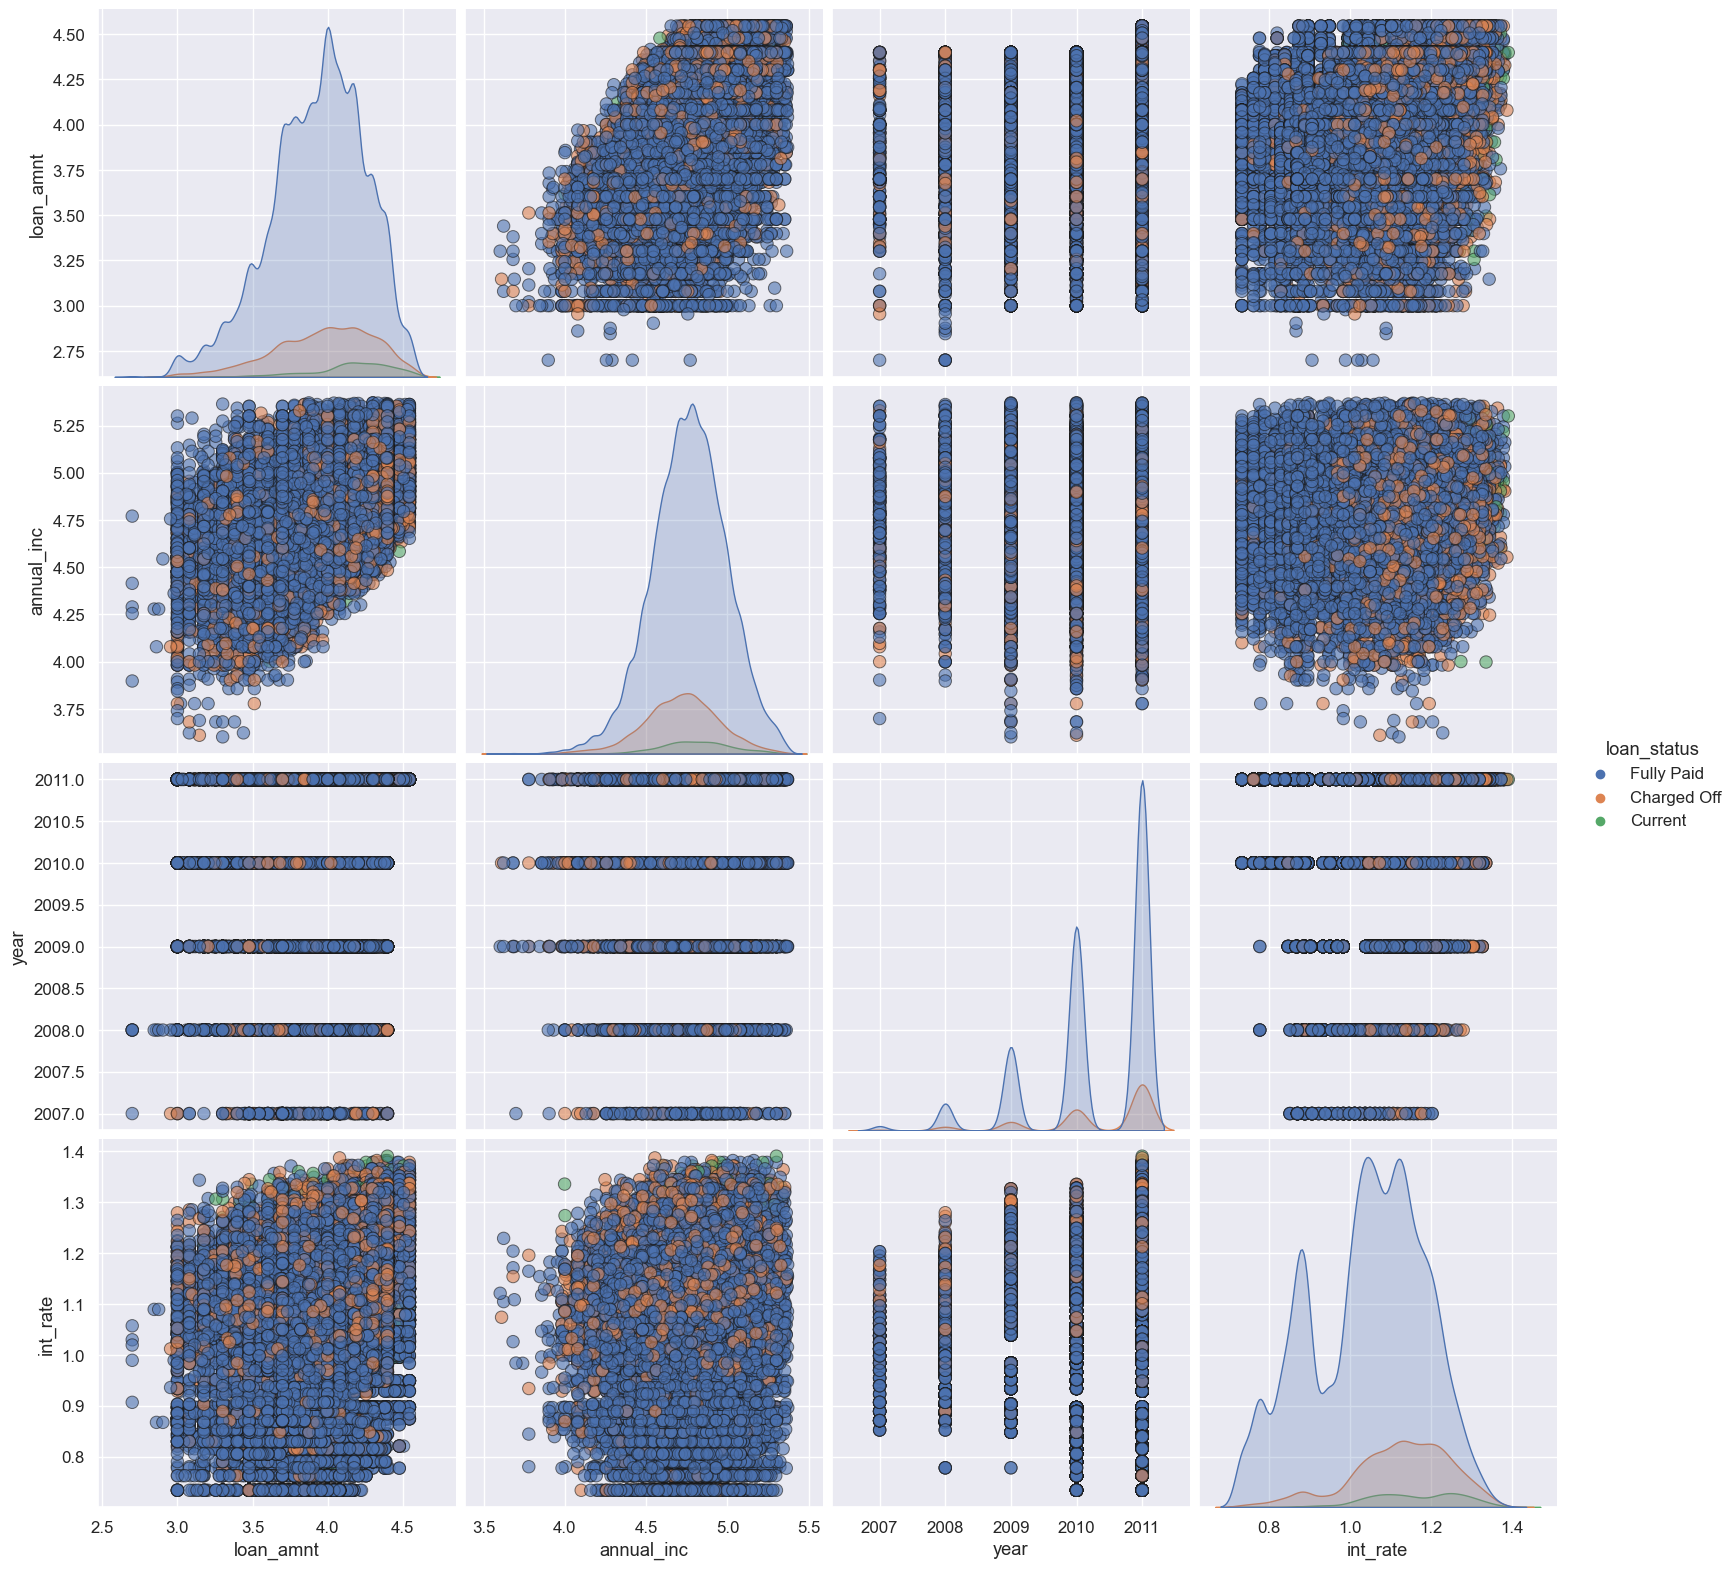

In [486]:
# Drawing a pair plot for multivariate analysis


loan_pair = data[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly.
# increase in number of charged off with increase in year.
# intrest rate is increasing with loan amount increase

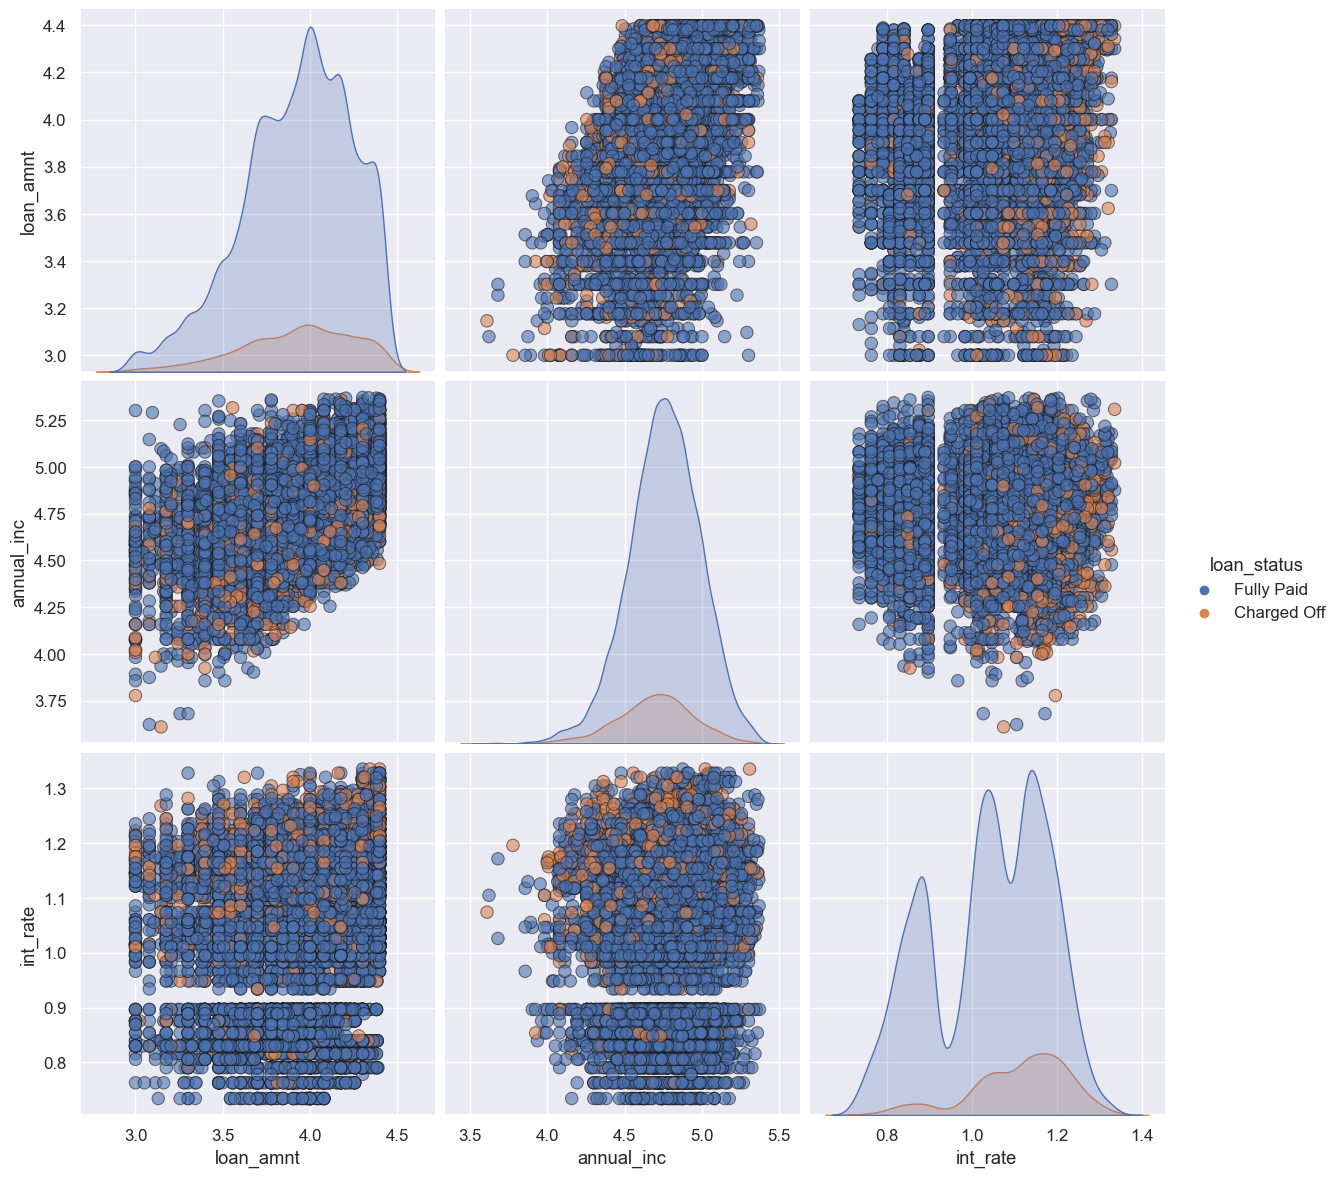

In [487]:
# Above plot is too dense so just pick year 2010 for getting some insights.

sns.pairplot(loan_pair[loan_pair['year'] == 2010], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly
# Intrest rate is increasing with loan amount increase this results in high charged off.

<h2 style = "text-align: center;color : Black">End of the Project</h2>
